# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Современные методы машинного обучения" </center>

# <center> Лабораторная работа №1. Image Classification. </center>

В данной лабораторной работе вам предлагается обучить модель на основе нейронной сети для распознавания рукописных букв английского алфавита.

## Данные

Данные представлены двумя датасетами: обучающим (`train`) и тестовым (`test`). Изображения для каждого датасета находятся в `images.zip`.  
  
Обучающая выборка состоит из 65000 изображений - по 2500 изображений для каждой буквы.  
Тестовая выборка состоит из 13000 изображений - по 500 изображений для каждой буквы.  
  
Все изображения - монохромные (но в формате RGB), размерности $28 \times 28$ пикселей, в формате JPEG. 
В названии каждого файла содержатся буква, которая представлена на изображении, и уникальный номер изображения: `a_00002.jpg`.  
  
**NB:** Все изображения представлены в перевернутом виде, для корректного отображения их нужно сначала транспонировать. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
pic = plt.imread('images/train/a/a_00002.jpg')
print(pic.shape)

(28, 28, 3)


In [3]:
pic = np.transpose(pic, axes=(1, 0, 2))

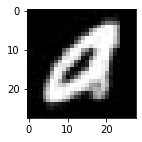

In [4]:
plt.figure(figsize=(2,2))
plt.imshow(pic)
plt.show()

In [65]:
torch.tensor(pic)

tensor([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [4, 4, 4]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=torch.uint8)

Ваша задача - создать и обучить модель на основе нейронной сети, которая будет предсказывать букву на картинке.  
Обучение необходимо проводить на данных из `train`, качество модели проверять на данных из `test`.  
Целевая метрика - accuracy.  
Для моделирования необходимо использовать `pytorch`.

## Основные задания

In [2]:
import os
from sklearn.model_selection import train_test_split
from torch import nn
from torch.utils.data import DataLoader

In [9]:
def get_data_and_targets_lst(path):
    data=[]
    targets=[]
    for root, currentDirectory, files in os.walk(path):
        for file in files:
            pic = plt.imread(os.path.join(root, file))
            pic = torch.tensor(np.transpose(pic, axes=(1, 0, 2)))
            pic = torch.div(pic, 255)
            target = ord(file[0]) - ord('a')
            data.append(pic)
            targets.append(target)
    return data,targets

In [4]:
class MyDataset(torch.utils.data.Dataset): 
    
    def __init__(self, x, y):
        self.x=x
        self.y=y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        #return {'sample': self.x[idx], 'target': self.y[idx]}
        return self.x[idx],self.y[idx]

In [8]:
X,y = get_data_and_targets_lst("images/train")

In [9]:
X[60000].dtype

torch.float32

15


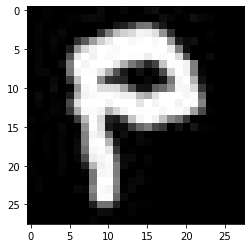

In [10]:
plt.imshow(X[60000])
print(y[60000])

In [11]:
len(y)

65000

In [12]:
# for i in range(len(y)):
#     ls = [0 for a in range(26)]
#     ls[y[i]] = 1
#     y[i]= ls

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [14]:
len(X_test), len(y_test)

(13000, 13000)

In [15]:
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)
#train_dataset.__getitem__(40000)

In [16]:
batch_size=64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)
for batch, (X, y) in enumerate(train_dataloader):
    print(batch)
    print(y)
    print("Shape of X [N, C, H, W]: ", X.shape)
    #NHWC now
    print("Shape of y: ", y.shape, y.dtype)
    break

0
tensor([17, 10, 23, 25, 18, 21, 24,  2,  2,  7, 25,  7, 18,  2, 11,  6, 24, 21,
        16, 13, 23,  8,  0,  0,  7,  1, 17,  8,  9,  5, 10,  3, 24, 24,  5,  3,
        21, 12, 12,  6,  9,  9, 18, 10, 13, 22, 20, 17,  3, 11, 24, 20, 10, 15,
        22, 24, 21,  4,  9, 10,  2,  6, 15,  6])
Shape of X [N, C, H, W]:  torch.Size([64, 28, 28, 3])
Shape of y:  torch.Size([64]) torch.int64


In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cpu device


In [5]:
def train(dataloader, model, loss_fn, optimizer, to_NCHW = False):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        if to_NCHW:
            X = X.permute(0, 3, 1, 2)
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        #print(pred.shape)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [6]:
def test(dataloader, model, loss_fn, to_NCHW = False):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            if to_NCHW:
                X = X.permute(0, 3, 1, 2)
            X, y = X.to(device), y.to(device)
            pred = model(X)
            #print(pred.shape)
            #print(loss_fn(pred, y).item())
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [152]:
def get_model_accuracy(dataloader, model, to_NCHW = False):
    size = len(dataloader.dataset)
    correct = 0
    with torch.no_grad():
        for X, y in dataloader:
            if to_NCHW:
                X = X.permute(0, 3, 1, 2)
            X, y = X.to(device), y.to(device)
            pred = model(X)
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    return correct / size       

In [7]:
def get_all_model_predictions(dataloader, model):
    size = len(dataloader.dataset)
    correct = 0
    predictions = []
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            predictions.extend(pred.argmax(1))
#             if len(pred.argmax(1))>1:
#                 print(pred.argmax(1))
    return list(map(lambda x : x.item(), predictions)) 

In [8]:
def learning_cycle(epochs, model, loss_fn, optimizer, to_NCHW = False):
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer, to_NCHW = to_NCHW)
        test(test_dataloader, model, loss_fn, to_NCHW = to_NCHW)
        #print("Done!")
    

# 1.1

In [155]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28*3, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 26),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [60]:
model_lin3 = NeuralNetwork()

In [63]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_lin3.parameters(), lr=0.001)
learning_cycle(100, model_lin3, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 0.164653  [    0/52000]
loss: 0.127538  [ 6400/52000]
loss: 0.180000  [12800/52000]
loss: 0.147644  [19200/52000]
loss: 0.122918  [25600/52000]
loss: 0.195282  [32000/52000]
loss: 0.224994  [38400/52000]
loss: 0.103376  [44800/52000]
loss: 0.090866  [51200/52000]
Test Error: 
 Accuracy: 89.7%, Avg loss: 0.329302 

Epoch 2
-------------------------------
loss: 0.176525  [    0/52000]
loss: 0.124658  [ 6400/52000]
loss: 0.178529  [12800/52000]
loss: 0.143856  [19200/52000]
loss: 0.121016  [25600/52000]
loss: 0.194624  [32000/52000]
loss: 0.222644  [38400/52000]
loss: 0.103204  [44800/52000]
loss: 0.090130  [51200/52000]
Test Error: 
 Accuracy: 89.7%, Avg loss: 0.329074 

Epoch 3
-------------------------------
loss: 0.175267  [    0/52000]
loss: 0.126052  [ 6400/52000]
loss: 0.177181  [12800/52000]
loss: 0.142792  [19200/52000]
loss: 0.120270  [25600/52000]
loss: 0.193847  [32000/52000]
loss: 0.220781  [38400/52000]
loss: 0.102979  [44800/520

KeyboardInterrupt: 

In [26]:
X_train[0].shape

torch.Size([28, 28, 3])

In [29]:
pred = model_lin3(X_train[30000].reshape([1,28,28,3]))

In [30]:
pred,y_train[30000]

(tensor([[ 1.0993,  0.5538,  0.7079,  1.2388,  2.4340, -3.4347,  2.0249, -4.4850,
           2.1795,  4.6166, -2.8972, -0.7925, -4.5708,  0.0577,  0.2800, -6.4989,
           1.5176, -0.1443,  7.2079, -0.5022, -0.1008, -0.4243, -1.7218,  0.7388,
          -2.8633,  2.2253]], grad_fn=<AddmmBackward0>),
 18)

In [25]:
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super(NeuralNetwork2, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_sigmoid_stack = nn.Sequential(
            nn.Linear(28*28*3, 512),
            nn.Sigmoid(),
            nn.Linear(512, 26),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_sigmoid_stack(x)
        return logits

In [26]:
model_lin2 = NeuralNetwork2()

In [174]:
loss_fn = nn.CrossEntropyLoss()
optimizer2 = torch.optim.SGD(model_lin2.parameters(), lr=0.01)
learning_cycle(100, model_lin2, loss_fn, optimizer2)

Epoch 1
-------------------------------
loss: 0.137345  [    0/52000]
loss: 0.146575  [ 6400/52000]
loss: 0.153579  [12800/52000]
loss: 0.111367  [19200/52000]
loss: 0.111554  [25600/52000]
loss: 0.116125  [32000/52000]
loss: 0.148341  [38400/52000]
loss: 0.134432  [44800/52000]
loss: 0.073476  [51200/52000]
Test Error: 
 Accuracy: 90.1%, Avg loss: 0.306859 

Epoch 2
-------------------------------
loss: 0.137117  [    0/52000]
loss: 0.146256  [ 6400/52000]
loss: 0.153181  [12800/52000]
loss: 0.110923  [19200/52000]
loss: 0.111362  [25600/52000]
loss: 0.115852  [32000/52000]
loss: 0.148152  [38400/52000]
loss: 0.134225  [44800/52000]
loss: 0.073289  [51200/52000]
Test Error: 
 Accuracy: 90.1%, Avg loss: 0.306856 

Epoch 3
-------------------------------
loss: 0.136889  [    0/52000]
loss: 0.145938  [ 6400/52000]
loss: 0.152785  [12800/52000]
loss: 0.110481  [19200/52000]
loss: 0.111170  [25600/52000]
loss: 0.115580  [32000/52000]
loss: 0.147964  [38400/52000]
loss: 0.134019  [44800/520

loss: 0.144322  [38400/52000]
loss: 0.130117  [44800/52000]
loss: 0.069583  [51200/52000]
Test Error: 
 Accuracy: 90.2%, Avg loss: 0.306865 

Epoch 24
-------------------------------
loss: 0.132225  [    0/52000]
loss: 0.139356  [ 6400/52000]
loss: 0.144839  [12800/52000]
loss: 0.101633  [19200/52000]
loss: 0.107309  [25600/52000]
loss: 0.110005  [32000/52000]
loss: 0.144145  [38400/52000]
loss: 0.129933  [44800/52000]
loss: 0.069416  [51200/52000]
Test Error: 
 Accuracy: 90.2%, Avg loss: 0.306869 

Epoch 25
-------------------------------
loss: 0.132008  [    0/52000]
loss: 0.139048  [ 6400/52000]
loss: 0.144478  [12800/52000]
loss: 0.101232  [19200/52000]
loss: 0.107132  [25600/52000]
loss: 0.109746  [32000/52000]
loss: 0.143970  [38400/52000]
loss: 0.129749  [44800/52000]
loss: 0.069250  [51200/52000]
Test Error: 
 Accuracy: 90.2%, Avg loss: 0.306873 

Epoch 26
-------------------------------
loss: 0.131792  [    0/52000]
loss: 0.138740  [ 6400/52000]
loss: 0.144118  [12800/52000]
l

loss: 0.132702  [ 6400/52000]
loss: 0.137241  [12800/52000]
loss: 0.093250  [19200/52000]
loss: 0.103559  [25600/52000]
loss: 0.104451  [32000/52000]
loss: 0.140402  [38400/52000]
loss: 0.126086  [44800/52000]
loss: 0.065938  [51200/52000]
Test Error: 
 Accuracy: 90.2%, Avg loss: 0.307018 

Epoch 47
-------------------------------
loss: 0.127365  [    0/52000]
loss: 0.132405  [ 6400/52000]
loss: 0.136913  [12800/52000]
loss: 0.092890  [19200/52000]
loss: 0.103396  [25600/52000]
loss: 0.104205  [32000/52000]
loss: 0.140238  [38400/52000]
loss: 0.125920  [44800/52000]
loss: 0.065789  [51200/52000]
Test Error: 
 Accuracy: 90.2%, Avg loss: 0.307028 

Epoch 48
-------------------------------
loss: 0.127159  [    0/52000]
loss: 0.132110  [ 6400/52000]
loss: 0.136586  [12800/52000]
loss: 0.092533  [19200/52000]
loss: 0.103233  [25600/52000]
loss: 0.103960  [32000/52000]
loss: 0.140074  [38400/52000]
loss: 0.125756  [44800/52000]
loss: 0.065640  [51200/52000]
Test Error: 
 Accuracy: 90.2%, Avg

KeyboardInterrupt: 

судя по всему более простая модель только с двумя линейными слоями и учится значительно быстрее и выдает результаты далеко не хуже с точки зрения метрик

так же большое значение играет здесь learning rate 

In [27]:
Xt,yt = get_data_and_targets_lst("images/test")

In [28]:
final_test_dataset = MyDataset(Xt, yt)
final_test_dataloader = DataLoader(final_test_dataset, batch_size=batch_size)

In [29]:
get_model_accuracy(final_test_dataloader, model_lin3)

0.03638461538461538

In [30]:
get_model_accuracy(final_test_dataloader, model_lin2)

0.038461538461538464

In [179]:
#torch.save(model_lin2.state_dict(), "my_models/model90.pth")

In [181]:
# model_lin2 = NeuralNetwork2()
# model_lin2.load_state_dict(torch.load("my_models/model90.pth"))

<All keys matched successfully>

# 1.2

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

In [184]:
predictions = get_all_model_predictions(final_test_dataloader, model_lin2)
len(predictions)

13000

In [185]:
print(13000/26)

500.0


In [186]:
cf_matrix = confusion_matrix(yt, predictions)

<AxesSubplot:>

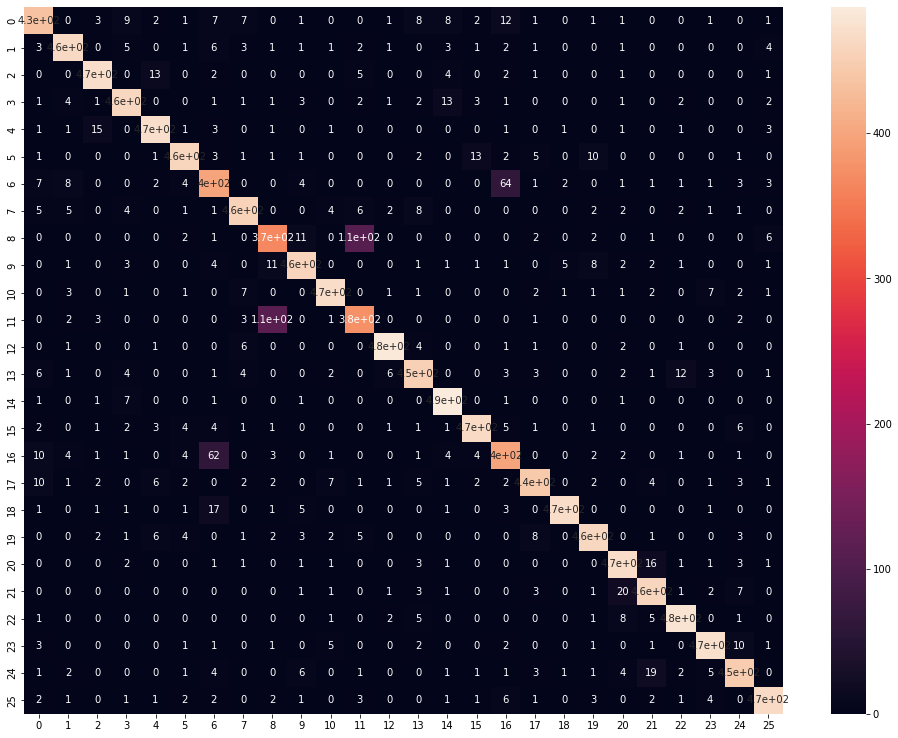

In [187]:
plt.figure(figsize=(17,13))
sns.heatmap(cf_matrix, annot=True)

<BarContainer object of 26 artists>

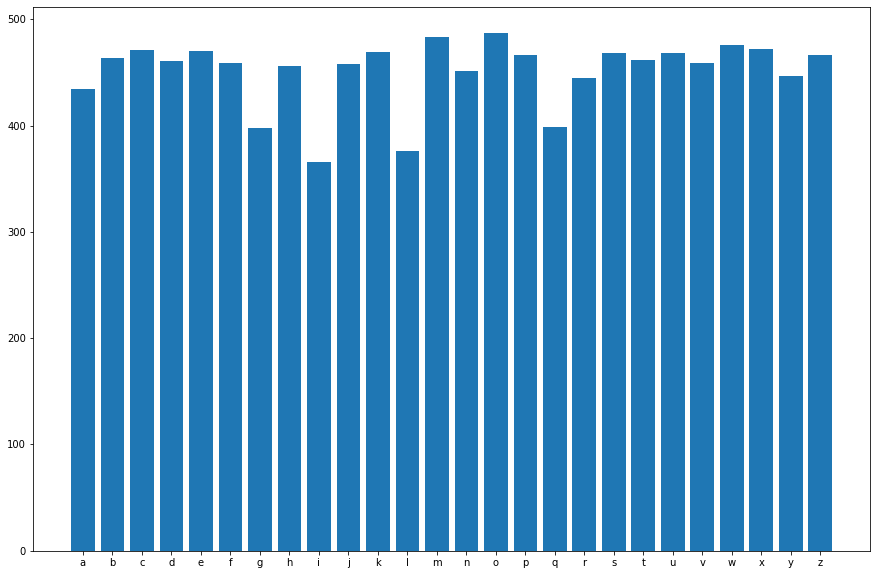

In [188]:
plt.figure(figsize=(15,10))
letters_stat = [cf_matrix[i][i] for i in range(26)]
plt.bar([chr(i+97) for i in range(26)], letters_stat)

In [189]:
chr(np.array(letters_stat).argmax() + 97), max(letters_stat)/500

('o', 0.974)

In [190]:
chr(np.array(letters_stat).argmin() + 97), min(letters_stat)/500

('i', 0.732)

# 1.3

In [191]:
def get_confusing_letters(cf_matrix, amount=10):
    matrix = cf_matrix.copy()
    for i in range(26):
        matrix[i][i] = 0
    confusion = []
    for i in range(26):
        for j in range(26):
            if len(confusion)<amount:
                confusion.append((matrix[i][j],chr(i+97),chr(j+97)))
            elif min(confusion, key=lambda el: el[0])[0] < matrix[i][j]:
                confusion = sorted(confusion, key=lambda el: el[0])
                confusion[0] = (matrix[i][j],chr(i+97),chr(j+97))
    return sorted(confusion, key=lambda el: el[0])

In [192]:
get_confusing_letters(cf_matrix, 20)

[(10, 'x', 'y'),
 (10, 'r', 'a'),
 (10, 'q', 'a'),
 (10, 'f', 't'),
 (11, 'j', 'i'),
 (11, 'i', 'j'),
 (12, 'n', 'w'),
 (12, 'a', 'q'),
 (13, 'f', 'p'),
 (13, 'd', 'o'),
 (13, 'c', 'e'),
 (15, 'e', 'c'),
 (16, 'u', 'v'),
 (17, 's', 'g'),
 (19, 'y', 'v'),
 (20, 'v', 'u'),
 (62, 'q', 'g'),
 (64, 'g', 'q'),
 (109, 'i', 'l'),
 (112, 'l', 'i')]

# 1.4 

In [193]:
sind = ord("s") - 97
cf_matrix[sind][sind]/500

0.936

In [194]:
sind

18

судя по confusion_matrix чаще всего модель путает букву "s" с буквами под номерами 6 и 9

In [195]:
chr(97+6), chr(97+9)

('g', 'j')

# 2

In [81]:
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 18, 5)

In [83]:
for batch, (X, y) in enumerate(train_dataloader):
    X = X.permute(0, 3, 1, 2)
    print(X.shape)
    X = conv1(X)
    print(X.shape)
    X = pool(X)
    print(X.shape)
    X = conv2(X)
    print(X.shape)
    X = pool(X)
    print(X.shape)
    break

torch.Size([64, 3, 28, 28])
torch.Size([64, 6, 24, 24])
torch.Size([64, 6, 12, 12])
torch.Size([64, 18, 8, 8])
torch.Size([64, 18, 4, 4])


In [98]:
class Conv2NeuralNetwork(nn.Module):
    def __init__(self):
        super(Conv2NeuralNetwork, self).__init__()
        self.convolution_relu_stack = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(6, 18, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(18*4*4,120),
            nn.ReLU(),
            nn.Linear(120,26)
        )
    def forward(self, x):
        x = self.convolution_relu_stack(x)
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [99]:
for batch, (X, y) in enumerate(train_dataloader):
    c = Conv2NeuralNetwork()
    print(c(X.permute(0, 3, 1, 2)).shape)
    break

torch.Size([64, 26])


In [100]:
model_conv2 = Conv2NeuralNetwork()

In [156]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_conv2.parameters(), lr=0.001)
learning_cycle(100, model_conv2, loss_fn, optimizer, to_NCHW=True)

Epoch 1
-------------------------------
loss: 0.039462  [    0/52000]
loss: 0.034689  [ 6400/52000]
loss: 0.109867  [12800/52000]
loss: 0.065822  [19200/52000]
loss: 0.021987  [25600/52000]
loss: 0.058419  [32000/52000]
loss: 0.117479  [38400/52000]
loss: 0.059618  [44800/52000]
loss: 0.050001  [51200/52000]
Test Error: 
 Accuracy: 91.2%, Avg loss: 0.375702 

Epoch 2
-------------------------------
loss: 0.041266  [    0/52000]
loss: 0.035697  [ 6400/52000]
loss: 0.108346  [12800/52000]
loss: 0.065383  [19200/52000]
loss: 0.021559  [25600/52000]
loss: 0.058678  [32000/52000]
loss: 0.114139  [38400/52000]
loss: 0.058734  [44800/52000]
loss: 0.048613  [51200/52000]
Test Error: 
 Accuracy: 91.3%, Avg loss: 0.376421 

Epoch 3
-------------------------------
loss: 0.041529  [    0/52000]
loss: 0.035107  [ 6400/52000]
loss: 0.107527  [12800/52000]
loss: 0.065130  [19200/52000]
loss: 0.021078  [25600/52000]
loss: 0.058905  [32000/52000]
loss: 0.111761  [38400/52000]
loss: 0.058225  [44800/520

KeyboardInterrupt: 

In [130]:
conv1 = nn.Conv2d(3, 8, 3)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(8, 16, 4)
conv3 = nn.Conv2d(16, 18, 2)

In [132]:
for batch, (X, y) in enumerate(train_dataloader):
    X = X.permute(0, 3, 1, 2)
    print(X.shape)
    X = conv1(X)
    print(X.shape)
    X = pool(X)
    print(X.shape)
    X = conv2(X)
    print(X.shape)
    X = pool(X)
    print(X.shape)
    X = conv3(X)
    print(X.shape)
    X = pool(X)
    print(X.shape)
    break

torch.Size([64, 3, 28, 28])
torch.Size([64, 8, 26, 26])
torch.Size([64, 8, 13, 13])
torch.Size([64, 16, 10, 10])
torch.Size([64, 16, 5, 5])
torch.Size([64, 18, 4, 4])
torch.Size([64, 18, 2, 2])


In [11]:
class Conv3NeuralNetwork(nn.Module):
    def __init__(self):
        super(Conv3NeuralNetwork, self).__init__()
        self.convolution_relu_stack = nn.Sequential(
            nn.Conv2d(3, 8, 3),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(8, 16, 4),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 18, 2),
            nn.MaxPool2d(2, 2),
        )
        
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(18*2*2,64),
            nn.ReLU(),
            nn.Linear(64,48),
            nn.ReLU(),
            nn.Linear(48,26),
        )
    def forward(self, x):
        x = self.convolution_relu_stack(x)
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [137]:
model_conv3 = Conv3NeuralNetwork()

In [157]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_conv3.parameters(), lr=0.0001)
learning_cycle(100, model_conv3, loss_fn, optimizer, to_NCHW=True)

Epoch 1
-------------------------------
loss: 0.154812  [    0/52000]
loss: 0.167734  [ 6400/52000]
loss: 0.193200  [12800/52000]
loss: 0.105485  [19200/52000]
loss: 0.106889  [25600/52000]
loss: 0.154339  [32000/52000]
loss: 0.193154  [38400/52000]
loss: 0.075379  [44800/52000]
loss: 0.122346  [51200/52000]
Test Error: 
 Accuracy: 91.3%, Avg loss: 0.288071 

Epoch 2
-------------------------------


KeyboardInterrupt: 

In [158]:
get_model_accuracy(final_test_dataloader, model_conv3, to_NCHW=True)

0.9140769230769231

In [159]:
#torch.save(model_conv3.state_dict(), "my_models/model91conv3.pth")

# 3

здесь загрузим пару моделей из обученных мной и продемонстрируем результаты на тестовых данных

In [91]:
model90 = NeuralNetwork2()
model90.load_state_dict(torch.load("my_models/model90.pth"))

<All keys matched successfully>

In [92]:
get_model_accuracy(final_test_dataloader, model90)

0.9027692307692308

### Задание 1  
  
*Вес в общей оценке - 0.35*  
  
1. Постройте и обучите модели с 2-мя и 3-мя полносвязными (dense) скрытыми слоями.  
При моделировании необходимо попробовать разные параметры нейронной сети - число нейронов на каждом слое, learning rate, batch size, функции активации, регуляризации и т.д. Оцените качество моделей с различными параметрами, проведите сравнительный анализ. 
2. Для наилучшей модели постройте confusion matrix результатов предсказаний модели на тестовых данных.  
Насколько равномерно обучилась ваша модель? Приведите буквы с самой лучшей и с самой худшей точностью детекции.
3. Найдите 10 пар букв, которые чаще всего путаются между собой, дайте возможное объяснение. Приведите примеры с картинками, которые были детектированы с ошибкой.
4. Возьмите первую букву вашей фамилии и укажите её точность детекции. С какими буквами ваша модель чаще всего путает эту букву?     

### Задание 2  
  
*Вес в общей оценке - 0.35*  
  
1. Постройте и обучите модели нейронной сети с 1-м, 2-мя и 3-мя сверточными слоями.  
Попробуйте различные значения параметров сверток и числа фильтров на каждом слое. Оцените качество моделей с различными параметрами, проведите сравнительный анализ.  
2. Для наилучшей конфигурации из предыдущего пункта, сравните, как меняется качество модели при увеличении размера батча при использовании BatchNorm и GroupNorm.    

### Задание 3    
  
Обучите модель с точностью (accuracy) на тестовых данных:  
- `>= 0.85`    +1 балл
- `>= 0.95`    +2 балла
- `>= 0.99`    +3 балла  

## Бонусные задания

**Задание 1 (1 балл).**  

Напишите на листке белой бумаги (маркером или ручкой) от 5 разных букв (можно больше 5 букв в целом с повторениями, но должно быть минимум 5 разных) английского алфавита (в датасете есть как прописные, так и строчные буквы). Сфотографируйте букву и приведите её картинку к размеру $28\times28$ и, желательно, к чёрно-белой палитре цветов. Передайте получившиеся изображения вашей модели и выполните предсказание, оцените результат.  
  
**Tips:**  
- В датасете все буквы занимают практически всё пространство картинки по высоте или ширине (или вместе). Если ваша буква будет слишком маленькой или большой, это может повлиять на результат детекции.
- Помните, что буква должна быть белого цвета, а фон - чёрного.
- Описание ваших действий при выполнении этого задания (что вы использовали, чтобы привести картинку к нужному виду) категорически приветствуется :)

# B1

я написал все буквы черной ручкой на белом листочке, больше всего меня интересовали q и p

In [77]:
model90 = Conv3NeuralNetwork()
model90.load_state_dict(torch.load("my_models/model91conv3.pth"))

<All keys matched successfully>

In [12]:
mX,my = get_data_and_targets_lst("custom_images")

In [13]:
my

[16, 25, 0, 12, 15]

In [18]:
for el in mX:
    print(el.shape)

torch.Size([1080, 1012, 3])
torch.Size([958, 1080, 3])
torch.Size([1043, 1080, 3])
torch.Size([936, 1080, 3])
torch.Size([1034, 1080, 3])


In [19]:
import cv2

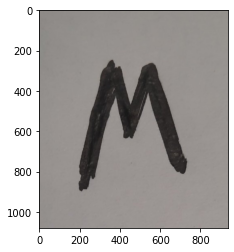

In [39]:
image = plt.imread('custom_images/m.jpg')
plt.imshow(image)

plt.show()

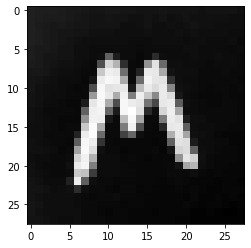

In [86]:
image = cv2.imread('custom_images/m.jpg')
#gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = cv2.resize(image, (28,28), interpolation=cv2.INTER_AREA)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image= np.invert(image)
plt.imshow(image, cmap='gray')
plt.show()

In [95]:
image

[[[array([117, 116, 116, 116, 115, 114, 114, 113, 112, 112, 113, 113, 112,
          112, 111, 111, 111, 112, 111, 111, 111, 111, 110, 111, 111, 111,
          111, 110], dtype=uint8),
   array([117, 116, 116, 116, 115, 114, 114, 113, 112, 112, 113, 113, 112,
          112, 111, 111, 111, 112, 111, 111, 111, 111, 110, 111, 111, 111,
          111, 110], dtype=uint8),
   array([117, 116, 116, 116, 115, 114, 114, 113, 112, 112, 113, 113, 112,
          112, 111, 111, 111, 112, 111, 111, 111, 111, 110, 111, 111, 111,
          111, 110], dtype=uint8)],
  [array([117, 116, 116, 116, 115, 114, 114, 113, 112, 112, 113, 113, 112,
          112, 111, 111, 111, 112, 111, 111, 111, 111, 110, 111, 111, 111,
          111, 110], dtype=uint8),
   array([117, 116, 116, 116, 115, 114, 114, 113, 112, 112, 113, 113, 112,
          112, 111, 111, 111, 112, 111, 111, 111, 111, 110, 111, 111, 111,
          111, 110], dtype=uint8),
   array([117, 116, 116, 116, 115, 114, 114, 113, 112, 112, 113, 113, 112,

**Задание 2 (1 балл):**    
  
Используйте transfer learning подход для решения задачи - дообучите какую-либо модель, предобученную на ImageNet, для классификации рукописных букв. Оцените качество решения.  
В качестве предобученой модели можно взять одну из [torchvision models](https://pytorch.org/vision/stable/models.html).

**Задание 3 (1 балл):**  
  
Добавьте вывод значений функции потерь и accuracy в tensorboard.  
Метрики нужно выводить и для обучающей, и для тестовой выборки.